In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [2]:
# load the data
reddit_data = pd.read_csv('Reddit_Data.csv')
reddit_data.head() #display first 5 rows

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
#basic information of the data
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [4]:
#checking for null values
reddit_data.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [5]:
#distinct value counts in the category column
reddit_data['category'].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [6]:
# Check the number of rows before dropping null values
rows_before = reddit_data.shape[0]

# Drop rows where 'clean_comment' has null values
reddit_data = reddit_data.dropna(subset=['clean_comment'])

# Check the number of rows after dropping null values
rows_after = reddit_data.shape[0]

# Print the results
print(f"Number of rows before dropping nulls: {rows_before}")
print(f"Number of rows after dropping nulls: {rows_after}")
print(f"Number of rows dropped: {rows_before - rows_after}")

Number of rows before dropping nulls: 37249
Number of rows after dropping nulls: 37149
Number of rows dropped: 100


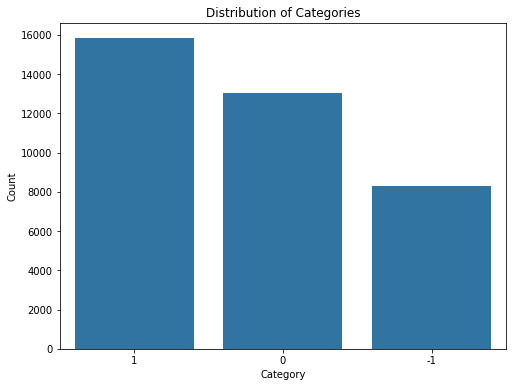

In [7]:
# Create the countplot for the 'category' column
plt.figure(figsize=(8, 6))
sns.countplot(data=reddit_data, x='category', order=reddit_data['category'].value_counts().index)
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

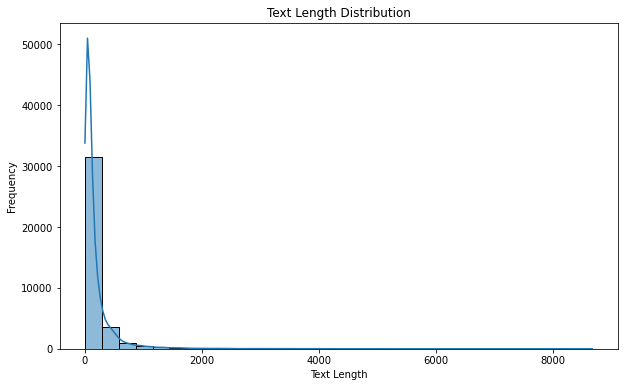

In [8]:
# Add a column for text length
reddit_data['text_length'] = reddit_data['clean_comment'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.histplot(reddit_data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

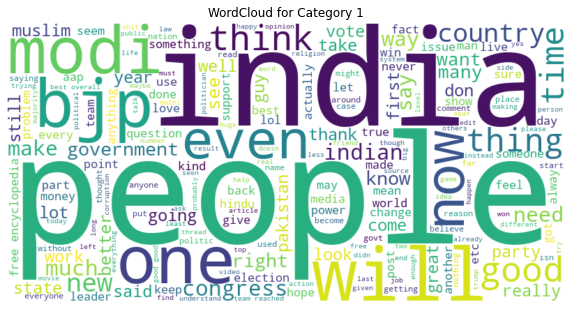

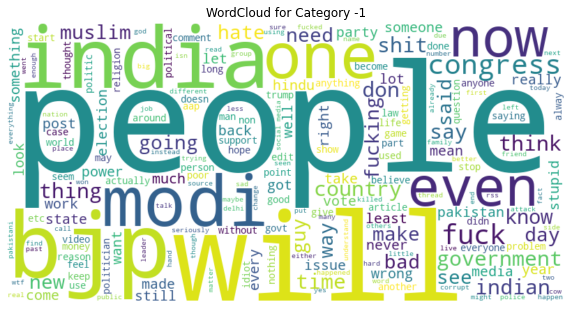

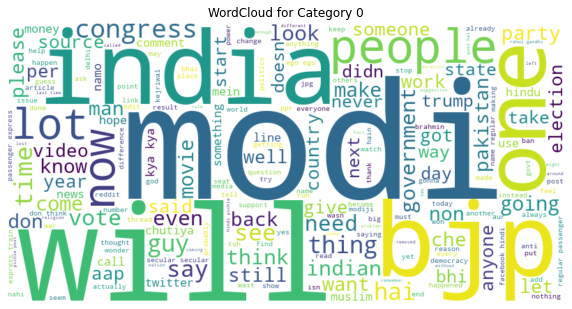

In [9]:
# Generate WordClouds for each category
categories = reddit_data['category'].unique()
for category in categories:
    text = " ".join(reddit_data[reddit_data['category'] == category]['clean_comment'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for Category {category}")
    plt.axis("off")
    plt.show()

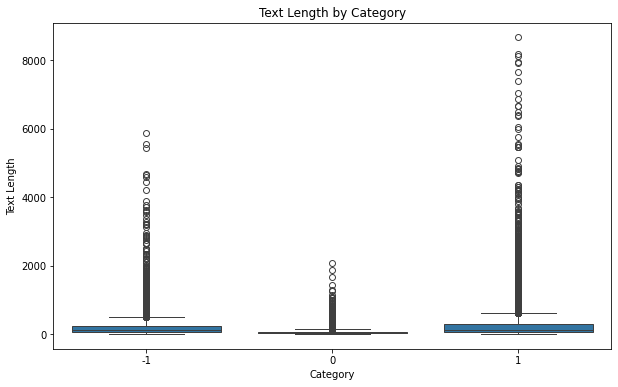

In [10]:
# Boxplot to compare text lengths across categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=reddit_data, x='category', y='text_length')
plt.title("Text Length by Category")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.show()

In [11]:
# Check value counts for each category
print(reddit_data['category'].value_counts(normalize=True) * 100)  # Display percentages

category
 1    42.612183
 0    35.107271
-1    22.280546
Name: proportion, dtype: float64


In [12]:
# Tokenize and count words for each category
categories = reddit_data['category'].unique()
for category in categories:
    words = " ".join(reddit_data[reddit_data['category'] == category]['clean_comment'].dropna()).split()
    word_counts = Counter(words).most_common(10)  # Top 10 words
    print(f"Most common words for category {category}:")
    print(pd.DataFrame(word_counts, columns=["Word", "Count"]))
    print("\n")

Most common words for category 1:
   Word  Count
0   the  37445
1   and  19205
2  that   9960
3   for   8325
4  this   8035
5   you   7117
6   are   6496
7  have   5470
8  they   5345
9   not   5312


Most common words for category -1:
   Word  Count
0   the  14538
1   and   7737
2  that   4124
3  this   3829
4   for   3312
5   you   3048
6   are   2981
7  they   2551
8   not   2525
9  have   2202


Most common words for category 0:
   Word  Count
0   the   5730
1   and   2016
2  this   1624
3   you   1571
4   for   1350
5  that   1297
6   are   1091
7  same   1031
8   not    863
9  modi    847




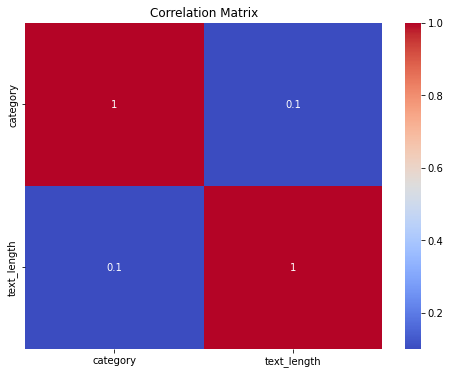

In [13]:
# Correlation matrix
numerical_cols = reddit_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = reddit_data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Ensure text data is in string format
reddit_data['clean_comment'] = reddit_data['clean_comment'].astype(str)

# Define the target variable (category) and features (clean_comment)
X = reddit_data['clean_comment']  # Text data
y = reddit_data['category']  # Target variable (sentiment category)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 27861
Testing set size: 9288


In [16]:
# Use TF-IDF for vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
# Convert to DataFrame
feature_names = vectorizer.get_feature_names_out()  # Get feature names
X_train_vec = pd.DataFrame(X_train_vec.toarray(), columns=feature_names)  # Create a DataFrame

# Display the first few rows
print(X_train_vec.head())

   000  100  1000  101  10th  120  150  16s  1947  1984  ...  youth  youtube  \
0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  ...    0.0      0.0   
1  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  ...    0.0      0.0   
2  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  ...    0.0      0.0   
3  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  ...    0.0      0.0   
4  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  ...    0.0      0.0   

   yra  yrs  zee  zen  zero  zindabad  zone  पड़त  
0  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  
2  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  
3  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  
4  0.0  0.0  0.0  0.0   0.0       0.0   0.0  0.0  

[5 rows x 5000 columns]


In [18]:
# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# Predict on the test set
y_pred = nb_model.predict(X_test_vec)

In [20]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.31      0.46      2034
           0       0.83      0.52      0.64      3287
           1       0.57      0.94      0.71      3967

    accuracy                           0.65      9288
   macro avg       0.78      0.59      0.60      9288
weighted avg       0.74      0.65      0.63      9288



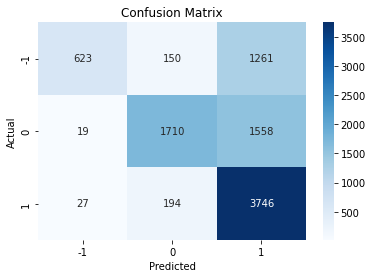

In [21]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nltk



In [23]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [24]:
# Assuming the column with text data is named 'clean_comment'
reddit_data['sentiment_score'] = reddit_data['clean_comment'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the categorization function
reddit_data['sentiment'] = reddit_data['sentiment_score'].apply(categorize_sentiment)


In [25]:
reddit_data.head()

,clean_comment,category,text_length,sentiment_score,sentiment
0,family mormon have never tried explain them t...,1,261,0.9349,Positive
1,buddhism has very much lot compatible with chr...,1,1269,0.9953,Positive
2,seriously don say thing first all they won get...,-1,460,0.8750,Positive
3,what you have learned yours and only yours wha...,0,168,0.0772,Positive
4,for your own benefit you may want read living ...,1,691,0.8907,Positive


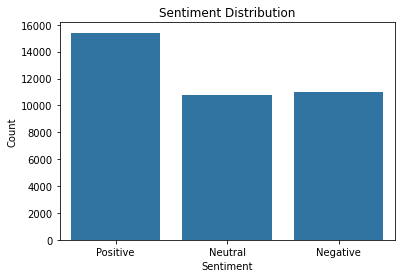

In [26]:
# Countplot for sentiment categories
sns.countplot(data=reddit_data, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


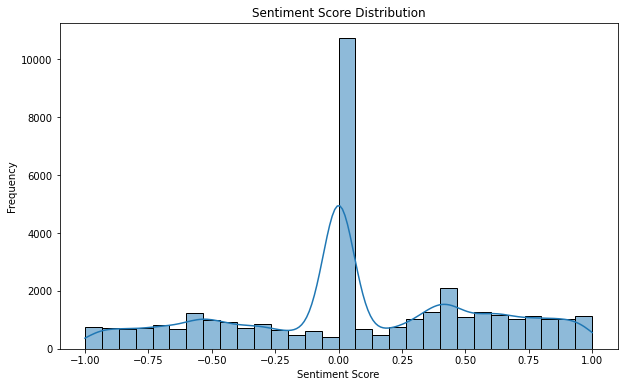

In [27]:
# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(reddit_data['sentiment_score'], kde=True, bins=30)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [28]:
# Test with some example text
examples = ["I love this product!", "This is terrible!", "It's okay, nothing special."]
for text in examples:
    score = sia.polarity_scores(text)
    print(f"Text: {text}")
    print(f"Sentiment Scores: {score}")
    print(f"Predicted Sentiment: {categorize_sentiment(score['compound'])}")
    print("-" * 40)

Text: I love this product!
Sentiment Scores: {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
Predicted Sentiment: Positive
----------------------------------------
Text: This is terrible!
Sentiment Scores: {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5255}
Predicted Sentiment: Negative
----------------------------------------
Text: It's okay, nothing special.
Sentiment Scores: {'neg': 0.367, 'neu': 0.325, 'pos': 0.309, 'compound': -0.092}
Predicted Sentiment: Negative
----------------------------------------
